# EXPLORATORY DATA ANALYSIS
We will be exploring a given dataset to learn the main characteristics of the data and see what we can deduce from them 

The Dataset we will be exploring is from Kaggle datasets on VIETNAM NATIONAL HIGHSCHOOL EXAM SCORE 2018 (https://www.kaggle.com/ngvietlg/vietnam-national-highschool-exam-score-2018)

## OBJECTIVES
+ We want to see the relationship students score in Math and Physics 
+ Predict a student physics score from his Math score 

## Importing the data

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb

#Import the data and select the first 100 rows 
data = pd.read_csv('VIETNAM NATIONAL HIGHSCHOOL EXAM SCORE 2018.csv', delimiter=',')

C:\Users\John Robert\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns. This means we have the data of {nRow} students')

There are 744396 rows and 17 columns. This means we have the data of 744396 students


In [3]:
#Display the first 10 data
data.head(10)

,ID,SoBD,Math,Viet,English,Physics,Chemistry,Biology,History,Geography,GDCD,Unnamed: 11,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1
0,1,18010226,3.0,3.75,3.0,NaN,NaN,NaN,3.0,6.50,8.25,NaN,NaN,NaN,13.25,9.75,NaN
1,2,18010229,8.8,7.50,9.0,NaN,NaN,NaN,6.0,9.00,8.25,NaN,NaN,NaN,22.50,25.3,NaN
2,3,18010232,6.0,5.50,4.0,5.75,5.50,5.00,NaN,NaN,NaN,NaN,17.25,16.50,NaN,15.5,15.75
3,4,18010242,3.4,5.75,2.6,NaN,NaN,NaN,3.5,4.75,7.25,NaN,NaN,NaN,14.00,11.75,NaN
4,5,18010247,3.8,6.75,3.0,NaN,NaN,NaN,3.5,6.25,8.00,NaN,NaN,NaN,16.50,13.55,NaN
5,6,18010252,5.0,6.50,2.2,2.00,3.50,4.25,NaN,NaN,NaN,NaN,10.50,12.75,NaN,13.7,9.20
6,7,18010259,2.4,6.25,3.6,NaN,NaN,NaN,5.0,6.00,8.00,NaN,NaN,NaN,17.25,12.25,NaN
7,8,18010262,2.6,3.75,3.0,NaN,NaN,NaN,3.0,4.50,7.75,NaN,NaN,NaN,11.25,9.35,NaN
8,9,18010265,4.8,7.25,2.2,4.00,5.00,4.25,NaN,NaN,NaN,NaN,13.80,14.05,NaN,14.25,11.00
9,10,18010268,6.0,6.50,4.6,3.75,6.25,5.75,NaN,NaN,NaN,NaN,16.00,18.00,NaN,17.1,14.35


This shows the first 10 students in the data

## Understanding the data

In [4]:
#Get information about the structure of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744396 entries, 0 to 744395
Data columns (total 17 columns):
ID             744396 non-null int64
SoBD           744396 non-null int64
Math           741024 non-null float64
Viet           728309 non-null float64
English        659998 non-null float64
Physics        323353 non-null float64
Chemistry      326981 non-null float64
Biology        319605 non-null float64
History        446118 non-null float64
Geography      433221 non-null float64
GDCD           379034 non-null float64
Unnamed: 11    0 non-null float64
KhoiA          321232 non-null float64
KhoiB          319516 non-null float64
KhoiC          432605 non-null float64
KhoiD          656353 non-null object
KhoiA1         307864 non-null float64
dtypes: float64(14), int64(2), object(1)
memory usage: 96.5+ MB


The dataset contain columns with numeric data

In [5]:
data.describe()

,ID,SoBD,Math,Viet,English,Physics,Chemistry,Biology,History,Geography,GDCD,Unnamed: 11,KhoiA,KhoiB,KhoiC,KhoiA1
count,744396.00000,7.443960e+05,741024.000000,728309.000000,659998.000000,323353.000000,326981.000000,319605.000000,446118.000000,433221.000000,379034.000000,0.0,321232.000000,319516.000000,432605.000000,307864.000000
mean,372198.50000,3.033333e+07,4.884162,5.444146,3.933543,4.961179,4.864391,4.561249,3.805371,5.483495,7.157468,NaN,15.523625,15.124206,14.622717,15.042056
std,214888.75983,1.905104e+07,1.440636,1.447793,1.567942,1.531097,1.523851,1.244402,1.241262,1.257440,1.233368,NaN,3.633543,3.211462,3.238440,3.462336
min,1.00000,1.000019e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,186099.75000,1.500588e+07,3.800000,4.500000,2.800000,3.750000,3.750000,3.750000,3.000000,4.750000,6.500000,NaN,13.100000,13.000000,12.500000,12.700000
50%,372198.50000,3.200454e+07,5.000000,5.500000,3.600000,5.000000,4.750000,4.500000,3.750000,5.500000,7.250000,NaN,15.650000,15.150000,14.500000,14.900000
75%,558297.25000,4.700776e+07,6.000000,6.500000,4.600000,6.000000,6.000000,5.250000,4.500000,6.250000,8.000000,NaN,18.000000,17.200000,16.750000,17.300000
max,744396.00000,6.400622e+07,10.000000,9.750000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,29.050000,29.550000,28.500000,28.950000


+ Math and physics seems to have very close mean 

## Relationship between Math and Physics

In [6]:
#max_physics = data.iloc[data['Physics'].idxmax()]
max_physics = data.loc[data['Physics'] == 10]
max_physics[['ID','Math','Physics','Chemistry','Biology','English','Viet']]

,ID,Math,Physics,Chemistry,Biology,English,Viet
156882,156883,8.6,10.0,9.75,5.50,5.0,7.50
277254,277255,8.8,10.0,8.75,5.25,6.8,4.25


In [7]:
#max_Math = data.iloc[data['Math'].idxmax()]
max_Math = data.loc[data['Math'] == 10]
max_Math[['ID','Math','Physics','Chemistry','Biology','English','Viet']]

,ID,Math,Physics,Chemistry,Biology,English,Viet
201656,201657,10.0,9.50,8.75,5.00,7.8,5.5
502570,502571,10.0,8.25,9.50,7.25,6.0,6.0


#### The student with the highest mark(10) in physics had 8.6 and 8.8 in Math while the student with the highest mark(10) in Math had 9.5 and 8.25 in physics 


In [8]:
min_Math = data.loc[data['Math'] == 0]
min_Math[['ID','Math','Physics','Chemistry','Biology','English','Viet']]

,ID,Math,Physics,Chemistry,Biology,English,Viet
20855,20856,0.0,NaN,NaN,NaN,NaN,3.50
21613,21614,0.0,NaN,NaN,NaN,0.0,NaN
21869,21870,0.0,NaN,NaN,NaN,NaN,4.00
22463,22464,0.0,NaN,NaN,NaN,0.0,NaN
55942,55943,0.0,NaN,NaN,NaN,NaN,0.00
60798,60799,0.0,NaN,NaN,NaN,NaN,NaN
81256,81257,0.0,0.0,0.0,NaN,NaN,NaN
173045,173046,0.0,NaN,NaN,NaN,NaN,0.25
179129,179130,0.0,NaN,NaN,NaN,0.0,NaN
214028,214029,0.0,NaN,NaN,NaN,0.0,0.00


In [9]:
min_Physics = data.loc[data['Physics'] == 0]
min_Physics[['ID','Math','Physics','Chemistry','Biology','English','Viet']]

,ID,Math,Physics,Chemistry,Biology,English,Viet
26455,26456,5.2,0.0,4.75,4.25,NaN,NaN
79961,79962,3.6,0.0,3.75,4.50,NaN,NaN
81256,81257,0.0,0.0,0.00,NaN,NaN,NaN
109489,109490,4.4,0.0,NaN,NaN,NaN,NaN
233329,233330,0.0,0.0,0.00,0.00,0.0,NaN
233668,233669,0.0,0.0,NaN,NaN,0.0,NaN
233745,233746,0.0,0.0,0.00,0.00,0.0,NaN
234484,234485,0.0,0.0,0.00,0.00,NaN,NaN
234726,234727,0.0,0.0,0.00,NaN,NaN,NaN
236680,236681,2.0,0.0,NaN,NaN,0.0,3.00


### Thess two tables shows if you don't pass math you will likely fail physics but you may fail physics and have average in the math

In [10]:
num_nan_Phy = sum(pd.isnull(data['Physics']))
num_nan_Math = data.loc[ (pd.isna(data['Math'])) , 'Math' ].shape[0]
print('The number of students that did not do physics is {}'.format(num_nan_Phy))
print('The number of students that did not do Math is {}'.format(num_nan_Math))

The number of students that did not do physics is 421043
The number of students that did not do Math is 3372


In [11]:
Math_Phy_data = data.dropna(subset = ['Math','Physics'])

Math_Phy_data_Row, Math_Phy_data_Col = Math_Phy_data.shape
no_math_and_pyhics = nRow - Math_Phy_data_Row
print("The number of students that didn't do both Math and physics is {}".format(no_math_and_pyhics))
math_no_physics = no_math_and_pyhics - num_nan_Phy
print("The number of students that did math but did do physics is {}".format(math_no_physics))
physics_no_math = no_math_and_pyhics - num_nan_Math
print("The number of students that did physics but did do math is {}".format(physics_no_math))

The number of students that didn't do both Math and physics is 421056
The number of students that did math but did do physics is 13
The number of students that did physics but did do math is 417684


### From the result above we can see that only 13 students did math only without doing physics.That means most students that did math believe or have confidence to do physics 

In [12]:
Math_Phy_data.head(10)

,ID,SoBD,Math,Viet,English,Physics,Chemistry,Biology,History,Geography,GDCD,Unnamed: 11,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1
2,3,18010232,6.0,5.50,4.0,5.75,5.50,5.00,NaN,NaN,NaN,NaN,17.25,16.50,NaN,15.5,15.75
5,6,18010252,5.0,6.50,2.2,2.00,3.50,4.25,NaN,NaN,NaN,NaN,10.50,12.75,NaN,13.7,9.20
8,9,18010265,4.8,7.25,2.2,4.00,5.00,4.25,NaN,NaN,NaN,NaN,13.80,14.05,NaN,14.25,11.00
9,10,18010268,6.0,6.50,4.6,3.75,6.25,5.75,NaN,NaN,NaN,NaN,16.00,18.00,NaN,17.1,14.35
11,12,18010287,4.2,5.00,4.0,3.50,4.00,5.00,NaN,NaN,NaN,NaN,11.70,13.20,NaN,13.2,11.70
12,13,18010289,6.0,3.25,3.2,2.00,2.75,4.00,NaN,NaN,NaN,NaN,10.75,12.75,NaN,12.45,11.20
16,17,18009301,5.8,5.25,4.8,4.00,5.75,4.00,NaN,NaN,NaN,NaN,15.55,15.55,NaN,15.85,14.60
18,19,18009428,6.6,7.50,5.0,6.25,4.25,4.25,5.25,7.75,9.0,NaN,17.10,15.10,20.5,19.1,17.85
19,20,18010011,5.4,6.50,3.6,4.75,3.75,2.75,NaN,NaN,NaN,NaN,13.90,11.90,NaN,15.5,13.75
20,21,18010020,6.4,7.00,5.2,7.00,6.50,4.75,NaN,NaN,NaN,NaN,19.90,17.65,NaN,18.6,18.60


In [13]:
Math_Phy_data.shape

(323340, 17)

+ Out of the 323340 students did both Math and Physics

In [14]:
Math_Phy_data.describe()

,ID,SoBD,Math,Viet,English,Physics,Chemistry,Biology,History,Geography,GDCD,Unnamed: 11,KhoiA,KhoiB,KhoiC,KhoiA1
count,323340.000000,3.233400e+05,323340.000000,313631.000000,307864.000000,323340.000000,321232.000000,313863.000000,34014.000000,33892.000000,29101.000000,0.0,321232.000000,313850.000000,33838.000000,307864.000000
mean,406598.703448,3.067061e+07,5.692527,5.524260,4.293163,4.961221,4.861597,4.545506,3.451064,5.158902,6.715491,NaN,15.523625,15.113679,13.502888,15.042056
std,205898.111826,1.954452e+07,1.241025,1.262336,1.615138,1.531088,1.516721,1.228839,1.007114,1.200033,1.199098,NaN,3.633543,3.173210,2.768728,3.462336
min,3.000000,1.001243e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,2.000000,0.000000
25%,238680.750000,1.300350e+07,5.000000,4.750000,3.200000,3.750000,3.750000,3.750000,2.750000,4.500000,6.000000,NaN,13.100000,13.000000,11.500000,12.700000
50%,426419.500000,3.401328e+07,5.800000,5.500000,4.000000,5.000000,4.750000,4.500000,3.250000,5.250000,6.750000,NaN,15.650000,15.100000,13.500000,14.900000
75%,575110.250000,4.800505e+07,6.600000,6.500000,5.200000,6.000000,6.000000,5.250000,4.000000,6.000000,7.500000,NaN,18.000000,17.150000,15.250000,17.300000
max,744396.000000,6.400622e+07,10.000000,9.500000,10.000000,10.000000,10.000000,10.000000,9.250000,9.500000,10.000000,NaN,29.050000,29.550000,26.250000,28.950000


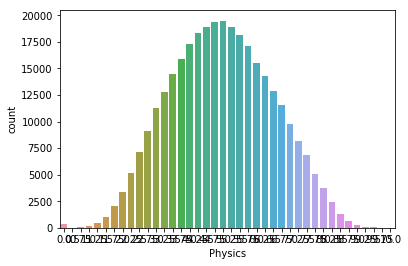

In [15]:
 Math_ax = sb.countplot(x="Physics", data=Math_Phy_data)

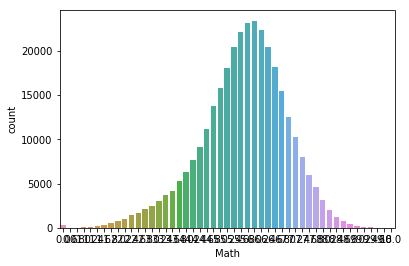

In [16]:
 Physic_ax = sb.countplot(x="Math", data=Math_Phy_data)

#  MACHINE LEARNING ALGORITHMS

In [17]:
#Using maths as the indenpendent variable(feature) and physics as the dependent value(target) 
X = Math_Phy_data.iloc[:,2:3].values
y = Math_Phy_data.iloc[:,5].values

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
#create model 
from sklearn.linear_model import LinearRegression 
linearReg = LinearRegression()

In [20]:
#Fit and train the model
linearReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
from sklearn.metrics import mean_absolute_error

#predicting test set 
lin_pred_test = linearReg.predict(X_test)

In [22]:
#checking the performance of the model 
lin_pred_test_df = pd.DataFrame({'Expected Score':y_test, 'Predicted Score':lin_pred_test })
lin_pred_test_df.head(20)

,Expected Score,Predicted Score
0,5.00,5.358759
1,4.00,3.945054
2,5.00,5.829994
3,5.25,4.573367
4,3.50,3.630897
5,6.50,5.358759
6,5.75,5.201680
7,3.75,4.259211
8,7.25,5.515837
9,4.50,5.515837


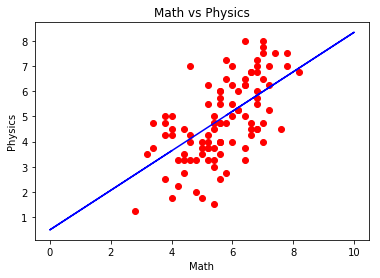

In [23]:
#Visualizing test data 
plt.scatter(X_train[: 100],y_train[:100],color ='red')
plt.plot(X_train,linearReg.predict(X_train), color ='blue')
plt.title('Math vs Physics')
plt.xlabel('Math')
plt.ylabel('Physics')
plt.show()

In [25]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lin_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lin_pred_test)))  

Mean Absolute Error: 0.9432439561340883
Mean Squared Error: 1.3817613719314532
Root Mean Squared Error: 1.1754834630616686


## Random Forest

In [26]:
#create model, fit and train the model
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
#deci_Tree_reg = DecisionTreeRegressor(max_leaf_nodes = 50,random_state = 0)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [27]:
#predicting test set 
rf_pred_test = rf_model.predict(X_test)

In [28]:
#checking the performance of the model 
rf_pred_test_df = pd.DataFrame({'Expected Score':y_test, 'Predicted Score':rf_pred_test })
rf_pred_test_df.head(20)

,Expected Score,Predicted Score
0,5.00,5.349146
1,4.00,3.874792
2,5.00,5.869869
3,5.25,4.536469
4,3.50,3.554956
5,6.50,5.349146
6,5.75,5.183019
7,3.75,4.188478
8,7.25,5.529011
9,4.50,5.529011


In [29]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,rf_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred_test))) 

Mean Absolute Error: 0.9374064233648689
Mean Squared Error: 1.3737864606874783
Root Mean Squared Error: 1.1720863708308693
